# Data Visualization exercise

In [5]:
# importing the package(s) we want to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
### The input file is tab-delimited
tsv_Filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# we can specify the delimiter by using the sep keyword argument
euk = pd.read_csv(tsv_Filepath, sep='\t')

print("Columns in the dataset:", euk.columns.tolist())

Columns in the dataset: ['Species', 'Kingdom', 'Class', 'Size (Mb)', 'GC%', 'Number of genes', 'Number of proteins', 'Publication year', 'Assembly status']


In [7]:
### Using .head() and .tail() to see data content
euk.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200,37660,2010,Chromosome


In [8]:
### .info() to provide information on the data
print("First few rows:")
print(euk.head())
print("\nLast few rows:")
print(euk.tail())
print("\nData info:")
print(euk.info())

First few rows:
                      Species   Kingdom           Class  Size (Mb)      GC%  \
0  Emiliania huxleyi CCMP1516  Protists  Other Protists    167.676     64.5   
1        Arabidopsis thaliana    Plants     Land Plants    119.669  36.0529   
2                 Glycine max    Plants     Land Plants    979.046  35.1153   
3         Medicago truncatula    Plants     Land Plants    412.924   34.047   
4        Solanum lycopersicum    Plants     Land Plants    828.349  35.6991   

  Number of genes Number of proteins  Publication year Assembly status  
0           38549              38554              2013        Scaffold  
1           38311              48265              2001      Chromosome  
2           59847              71219              2010      Chromosome  
3           37603              41939              2011      Chromosome  
4           31200              37660              2010      Chromosome  

Last few rows:
                       Species Kingdom        Class  Si

In [9]:
### What to do with '-' values?
## Change "-" into NAs
euk = euk.replace('-', pd.NA)

## Visualize the relationship between two variables

Can you see the relationship between genome size and the number of genes?



It is hard for us to see patterns by reading large tables of data. For example, look at the following table that contains the genome size and the number of genes for reptiles. Can you see the relationship between genome size and the number of genes?

In [14]:
## Look only look at reptile data using class 'Reptiles'
# Correct numeric columns list (use exact column names)
numeric_cols = ['Size (Mb)', 'Number of genes', 'Publication year', 'GC%']

# Convert columns to numeric
euk[numeric_cols] = euk[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [15]:
## Pick out data for just Reptiles with genome size < 4000
euk_reptiles = euk[euk['Class'] == 'Reptiles']
euk_reptiles_filtered = euk_reptiles[euk_reptiles['Size (Mb)'] < 4000]

### Use `relplot` to look at relationships
We will use the `relplot` function, and the names of the columns that we want on the `X` and `Y` axes to look at the relationship between genome size and number of genes in Reptiles

<Figure size 1000x600 with 0 Axes>

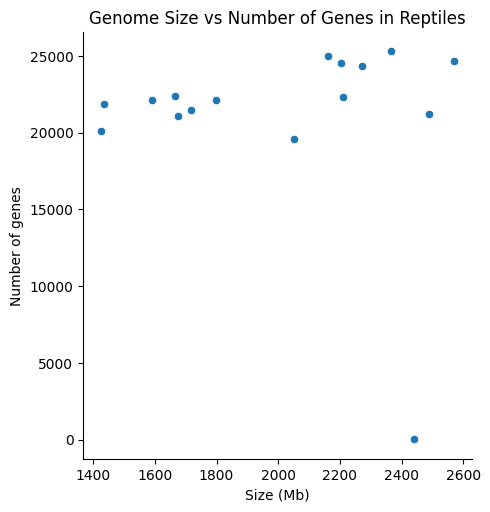

In [16]:
### Relationship plot between genome size and number of genes in Retiles
plt.figure(figsize=(10, 6))
sns.relplot(x='Size (Mb)', y='Number of genes', data=euk_reptiles_filtered)
plt.title('Genome Size vs Number of Genes in Reptiles')
plt.show()

### Can you create a new column to look at gene density?
gene density = Number of genes / Size (Mb)

In [17]:
### Your Code
# gene density = Number of genes / Size (Mb)
# create the new column
euk_reptiles_filtered['Gene Density'] = euk_reptiles_filtered['Number of genes'] / euk_reptiles_filtered['Size (Mb)']
print("\nGene density calculation:")
print(euk_reptiles_filtered[['Species', 'Gene Density']].head())



Gene density calculation:
                       Species  Gene Density
282        Anolis carolinensis     12.279200
565           Pogona vitticeps     12.492136
589  Platysternon megacephalum           NaN
612           Podarcis muralis           NaN
650          Cuora amboinensis           NaN


<ipython-input-17-a03e82420dc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euk_reptiles_filtered['Gene Density'] = euk_reptiles_filtered['Number of genes'] / euk_reptiles_filtered['Size (Mb)']


<Figure size 1000x600 with 0 Axes>

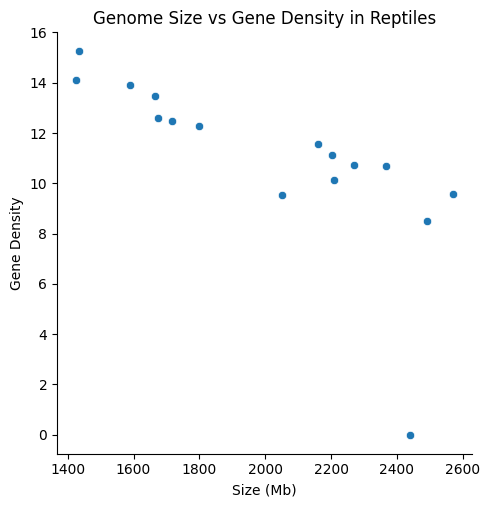

In [18]:
### Create the plot that represents the relation between Size (Mb) and density
# Is it what you expected?
plt.figure(figsize=(10, 6))
sns.relplot(x='Size (Mb)', y='Gene Density', data=euk_reptiles_filtered)
plt.title('Genome Size vs Gene Density in Reptiles')
plt.show()

## Seaborn
These are other `kind` plots that we did not try in lectures. Look up seaborn documentation and try to create these new plots.

1.   Create a violin plot for genome size distribution against Class Land Plants.
2.   Create a scatter plot showing the relationship between Kingdom and Publication year
3. Create a bar plot for GC% for each Kingdom

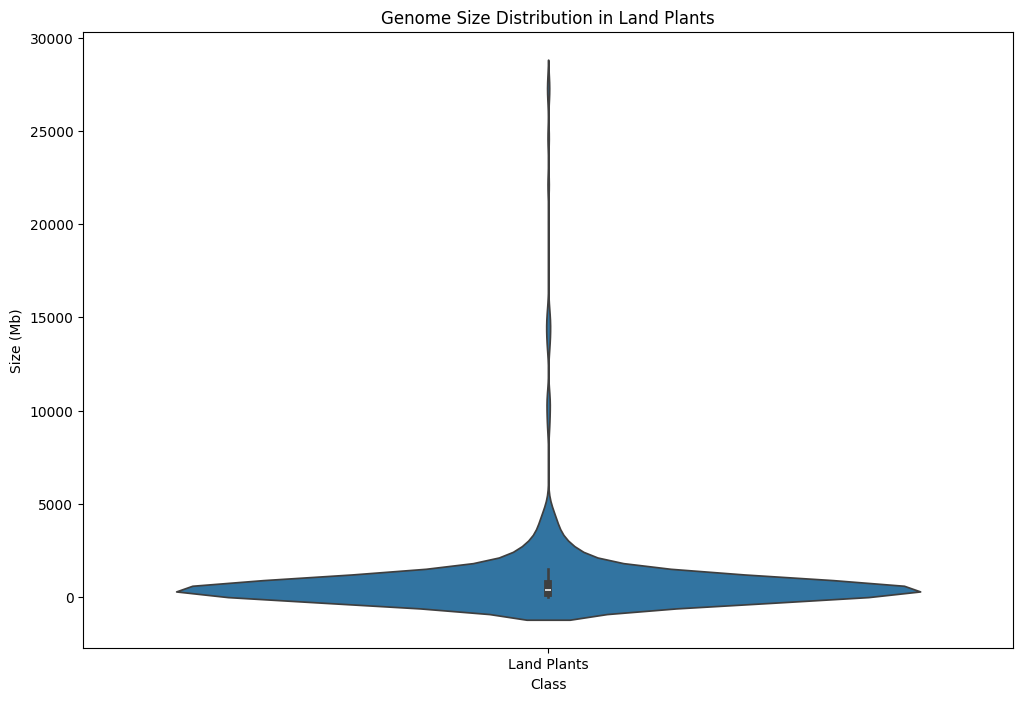

In [19]:
### Your code - Create a violin plot for genome size distribution against Class Land Plants.
land_plants = euk[euk['Class'] == 'Land Plants']
plt.figure(figsize=(12, 8))
sns.violinplot(x='Class', y='Size (Mb)', data=land_plants)
plt.title('Genome Size Distribution in Land Plants')
plt.show()

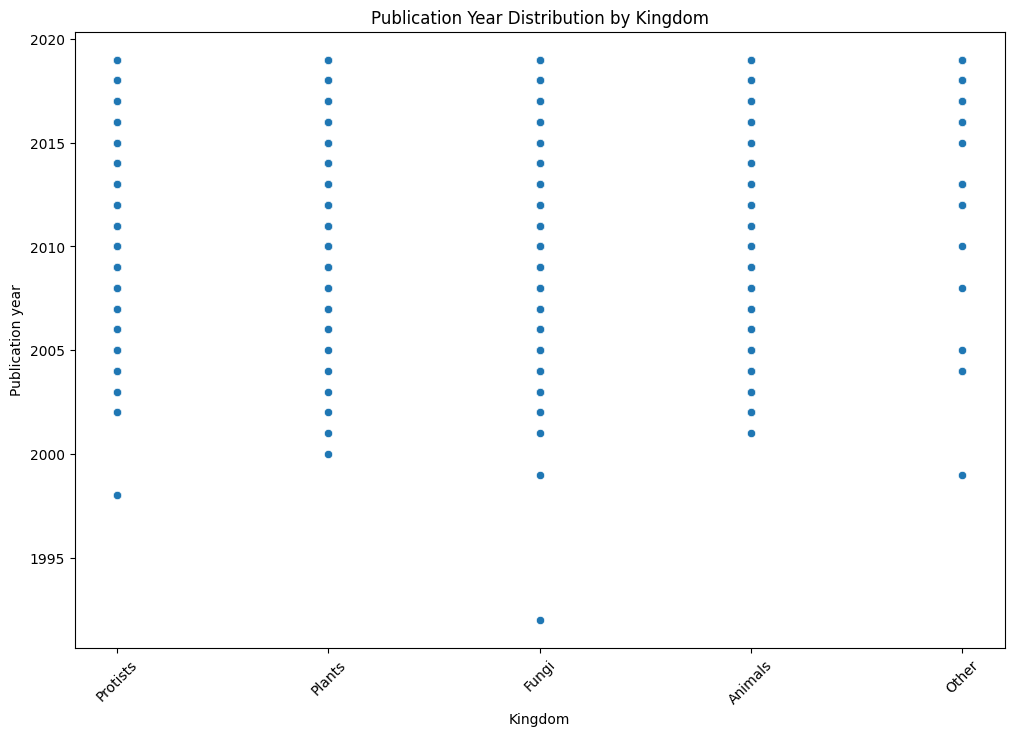

In [21]:
### Your code - Create a scatter plot showing the relationship between Kingdom and Publication year
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Kingdom', y='Publication year', data=euk)
plt.title('Publication Year Distribution by Kingdom')
plt.xticks(rotation=45)
plt.show()

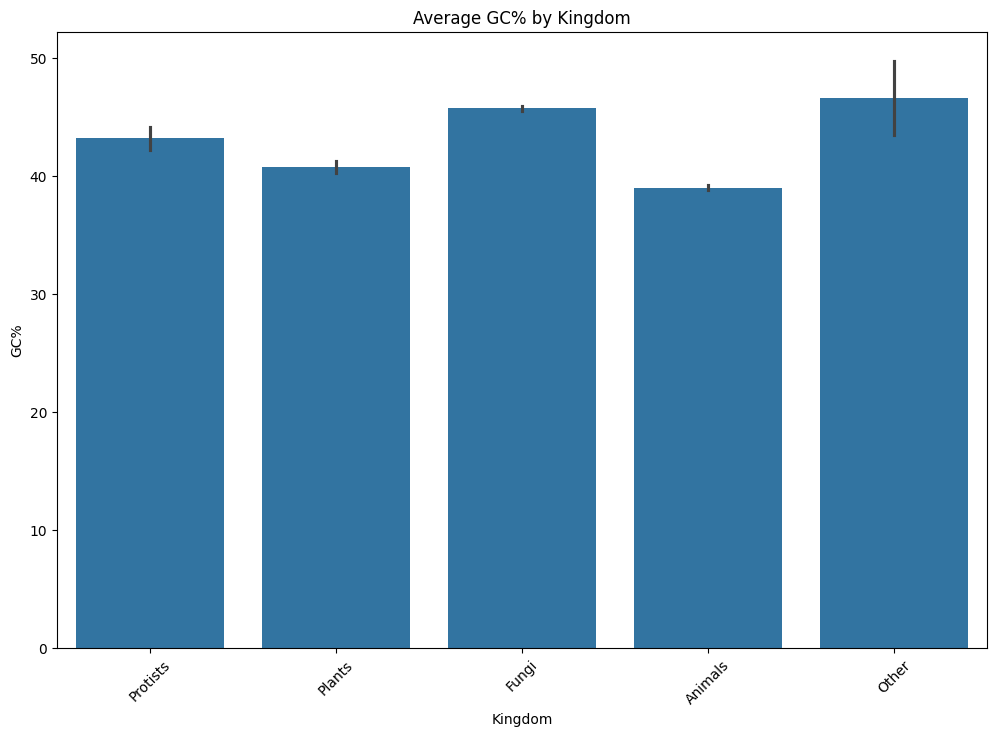

In [22]:
### Your code - Create a bar plot for GC% for each Kingdom
plt.figure(figsize=(12, 8))
sns.barplot(x='Kingdom', y='GC%', data=euk, estimator='mean')
plt.title('Average GC% by Kingdom')
plt.xticks(rotation=45)
plt.show()